In [1]:
from matplotlib import pyplot as plt

In [2]:
x = [10, 20, 30, 40]
y = [0, 15, 10, 25]

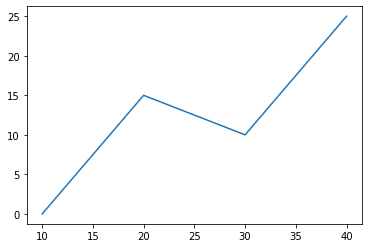

In [5]:
plt.plot(x,y)

# Seaborn

In [2]:
import seaborn as sns

In [7]:
sns.set()

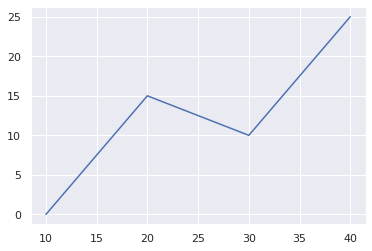

In [8]:
plt.plot(x,y)

In [10]:
sns.set_style('white')

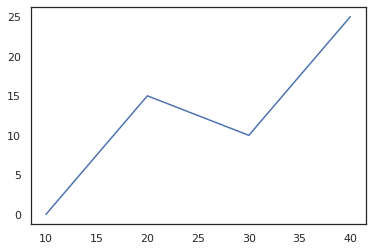

In [11]:
plt.plot(x,y)

# Seaborn with pandas

In [4]:
cars = sns.load_dataset('mpg')

In [5]:
type(cars)

pandas.core.frame.DataFrame

In [6]:
cars.dropna(inplace=True)

In [7]:
cars.shape

(392, 9)

In [8]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


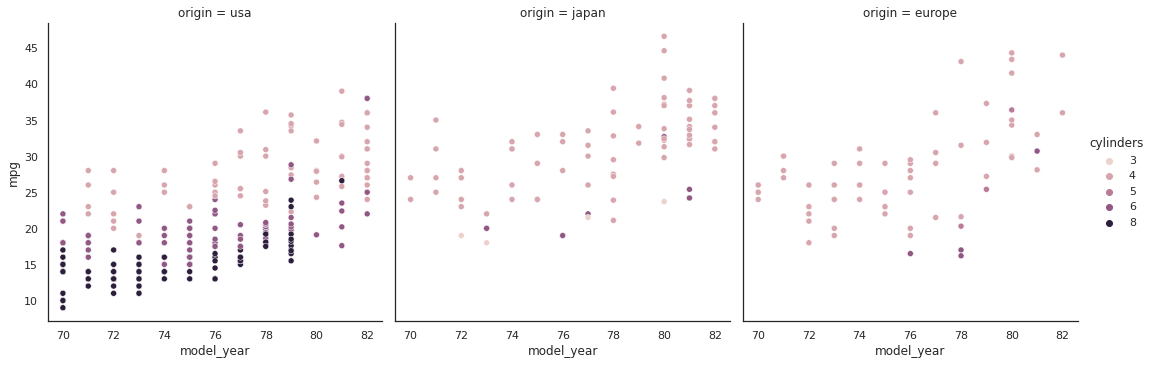

In [19]:
sns.relplot(x='model_year',y = 'mpg',col = 'origin',
            hue = 'cylinders', data = cars)

# KDE Plot  (Kernal Density Estimation
Allows us to estimate probability function
Non-Parametric way

In [4]:
cars = sns.load_dataset('mpg')
cars.dropna(inplace=True)

<AxesSubplot:>

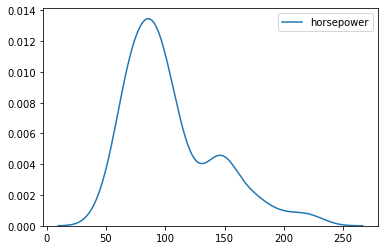

In [5]:
sns.kdeplot(cars.horsepower)

<AxesSubplot:>

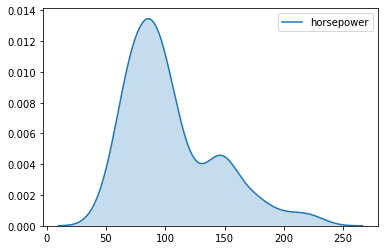

In [6]:
sns.kdeplot(cars.horsepower, shade = True)

<AxesSubplot:>

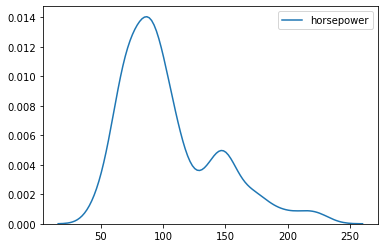

In [7]:
sns.kdeplot(cars.horsepower, bw = 10)

<AxesSubplot:>

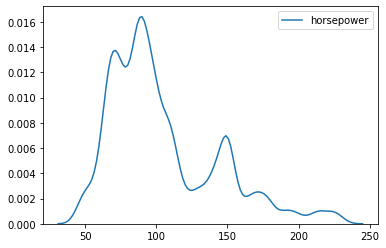

In [8]:
sns.kdeplot(cars.horsepower, bw = 5)

Band width controls the smoothing of the graph

lower = more jagged

higher = more smooth

<AxesSubplot:>

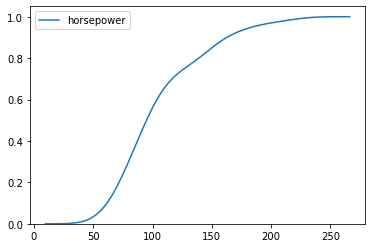

In [9]:
sns.kdeplot(cars.horsepower, cumulative = True)

# KDE 2d Plot

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

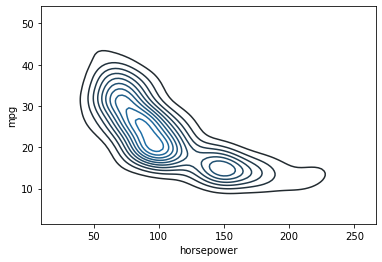

In [10]:
sns.kdeplot(cars.horsepower, cars.mpg)

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

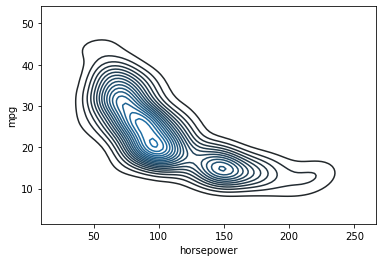

In [11]:
sns.kdeplot(cars.horsepower, cars.mpg, n_levels=20)

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

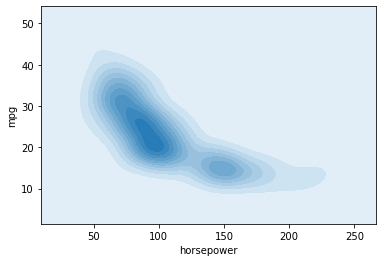

In [12]:
sns.kdeplot(cars.horsepower, cars.mpg, shade = True)

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

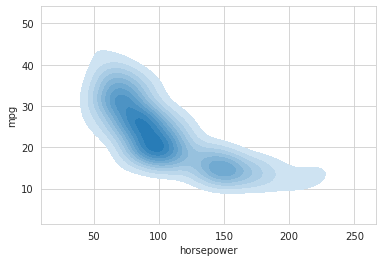

In [15]:
sns.set_style('whitegrid')
sns.kdeplot(cars.horsepower, cars.mpg, shade = True, shade_lowest=False)

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

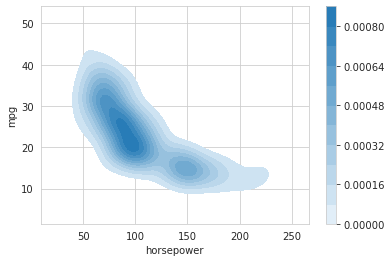

In [16]:
sns.kdeplot(cars.horsepower, cars.mpg, shade = True, 
            shade_lowest=False, cbar=True)

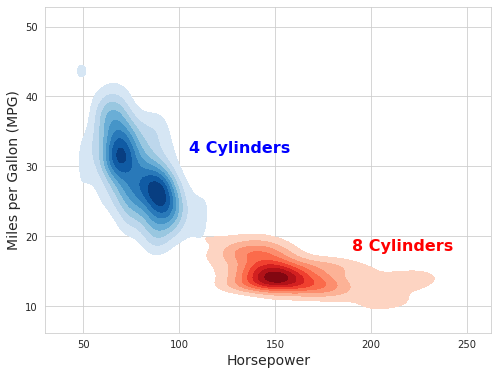

In [20]:

sns.set_style('whitegrid')

cyl_4 = cars[cars.cylinders==4]
cyl_8 = cars[cars.cylinders==8]

plt.figure(figsize=(8,6))

sns.kdeplot(cyl_4.horsepower, cyl_4.mpg,
            cmap="Blues", shade=True, shade_lowest=False)
sns.kdeplot(cyl_8.horsepower, cyl_8.mpg,
            cmap="Reds", shade=True, shade_lowest=False)

plt.xlabel('Horsepower', fontsize=14)
plt.ylabel('Miles per Gallon (MPG)', fontsize=14)

plt.annotate("4 Cylinders", (105, 32), color='blue', fontsize=16, fontweight='bold')
plt.annotate("8 Cylinders", (190, 18), color='red', fontsize=16, fontweight='bold');

# Regplots or Regression Plots

In [21]:
diamonds = sns.load_dataset('diamonds')

In [22]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [23]:
diamonds = diamonds.sample(n=200, random_state=44)

In [24]:
diamonds.shape

(200, 10)

In [25]:
sns.set_style('dark')

<AxesSubplot:xlabel='carat', ylabel='price'>

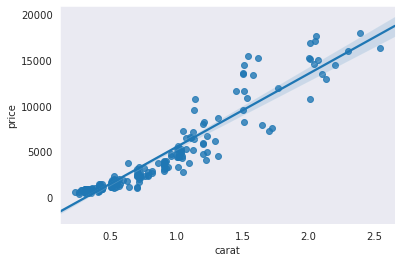

In [26]:
sns.regplot(diamonds.carat,diamonds.price)

<AxesSubplot:xlabel='carat', ylabel='price'>

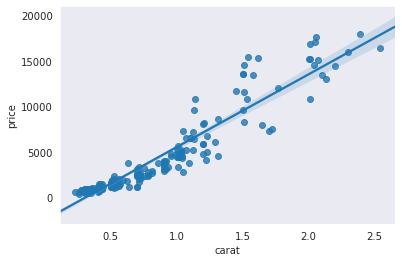

In [28]:
sns.regplot(x = 'carat', y='price', data = diamonds)

<AxesSubplot:xlabel='carat', ylabel='price'>

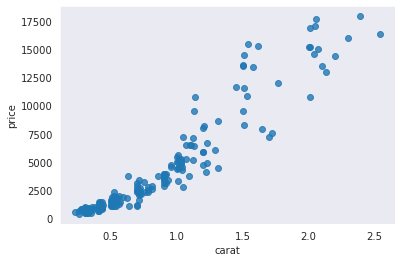

In [30]:
sns.regplot(x = 'carat', y='price', data = diamonds,fit_reg=False)

<AxesSubplot:xlabel='carat', ylabel='price'>

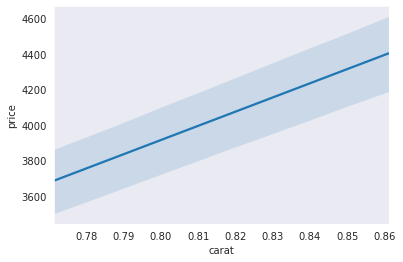

In [31]:
sns.regplot(x = 'carat', y='price', data = diamonds,scatter=False)

<AxesSubplot:xlabel='carat', ylabel='price'>

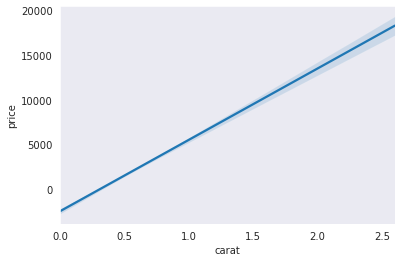

In [33]:
plt.gca().set(xlim =(0,2.6))
sns.regplot(x = 'carat', y='price', data = diamonds,scatter=False)

<AxesSubplot:xlabel='carat', ylabel='price'>

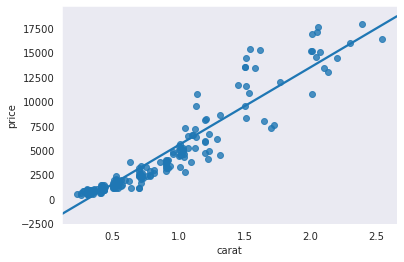

In [34]:
sns.regplot(x = 'carat', y='price', data = diamonds,ci=None)

# Discrete Variables

In [35]:
cut_map = {
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Premium': 4,
    'Ideal': 5
}

diamonds['cut_value'] = diamonds.cut.map(cut_map)

In [37]:
diamonds.cut_value.value_counts()

5    80
4    63
3    39
2    11
1     7
Name: cut_value, dtype: int64

### Jitter

<AxesSubplot:xlabel='cut_value', ylabel='price'>

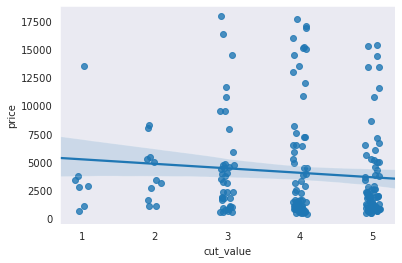

In [38]:

sns.regplot(x='cut_value', y='price', data=diamonds,
            x_jitter=0.1)

### Estimator Aggregate

In [40]:
import numpy as np

<AxesSubplot:xlabel='cut_value', ylabel='price'>

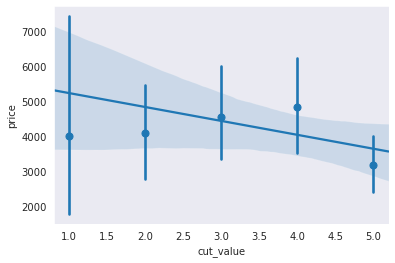

In [41]:
sns.regplot(x='cut_value', y='price', data=diamonds,
            x_estimator=np.mean)

# Models

Polynomial Regression (order)

<AxesSubplot:xlabel='carat', ylabel='price'>

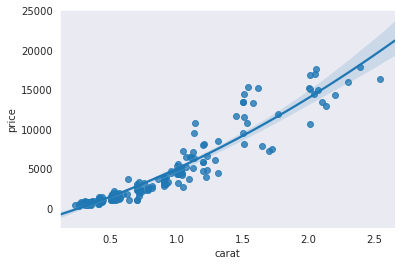

In [44]:
sns.regplot(x='carat', y='price', data=diamonds,
            order=2)

# Styling

<AxesSubplot:xlabel='carat', ylabel='price'>

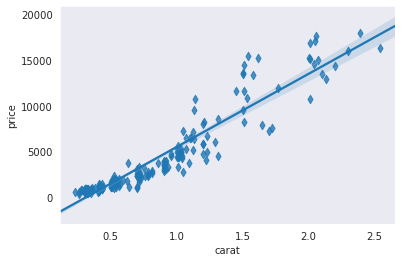

In [45]:
sns.regplot(x='carat', y='price', data=diamonds,  
            marker='d')
            

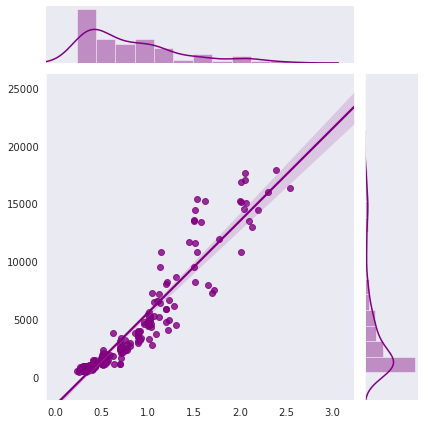

In [46]:

sns.jointplot(x='carat', y='price', data=diamonds, 
              kind='reg', 
              color='purple')
plt.xlabel('')
plt.ylabel('')
plt.xlim(-0.1, None)
plt.ylim(-2000, None)
plt.tight_layout();